In [2]:
import pyforest                                          #its include numpy,pandas,matplotlib,seaborn
from beautifultable import BeautifulTable 
import warnings
warnings.filterwarnings('ignore')  #ignore warnings

ModuleNotFoundError: ignored

In [ ]:
#import data
df=pd.read_csv("pubgdata.csv")


<IPython.core.display.Javascript object>

In [ ]:
#checkin shape of data like present records and columns

df.shape

(1111742, 30)

In [ ]:
#displaying data
df.head(2)

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,2093518,a3e3cea9f2e314,c9f6eaa81245b5,a3d8693390584c,0,0,25.93,0,0,0,...,0,0.0,0,0.0,0,0,151.3,1,1525,0.0667
1,3701672,43e4be7ad72cc7,521836de101ee8,b65de9055327e0,0,0,36.71,0,0,0,...,0,0.0,0,0.0,0,0,1918.0,7,1516,0.5862


In [ ]:
df.info() #description about table

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111742 entries, 0 to 1111741
Data columns (total 30 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   Unnamed: 0       1111742 non-null  int64  
 1   Id               1111742 non-null  object 
 2   groupId          1111742 non-null  object 
 3   matchId          1111742 non-null  object 
 4   assists          1111742 non-null  int64  
 5   boosts           1111742 non-null  int64  
 6   damageDealt      1111742 non-null  float64
 7   DBNOs            1111742 non-null  int64  
 8   headshotKills    1111742 non-null  int64  
 9   heals            1111742 non-null  int64  
 10  killPlace        1111742 non-null  int64  
 11  killPoints       1111742 non-null  int64  
 12  kills            1111742 non-null  int64  
 13  killStreaks      1111742 non-null  int64  
 14  longestKill      1111742 non-null  float64
 15  matchDuration    1111742 non-null  int64  
 16  matchType        1

# pre processing
 memory management


In [ ]:
start_mem = df.memory_usage().sum() / 1024**2
print('memory usage of dataframe is {:.2f}MB'.format(start_mem))

memory usage of dataframe is 254.46MB


In [ ]:
df.columns

Index(['Unnamed: 0', 'Id', 'groupId', 'matchId', 'assists', 'boosts',
       'damageDealt', 'DBNOs', 'headshotKills', 'heals', 'killPlace',
       'killPoints', 'kills', 'killStreaks', 'longestKill', 'matchDuration',
       'matchType', 'maxPlace', 'numGroups', 'rankPoints', 'revives',
       'rideDistance', 'roadKills', 'swimDistance', 'teamKills',
       'vehicleDestroys', 'walkDistance', 'weaponsAcquired', 'winPoints',
       'winPlacePerc'],
      dtype='object')

In [ ]:
print(df["Unnamed: 0"].min(),df["Unnamed: 0"].max(),sep=",")

6,4446964


In [ ]:
print(np.iinfo(np.int16).min, np.iinfo(np.int16).max, sep= ",")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

-32768,32767


In [ ]:
 """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage. reusable function
    """
def reduce_mem_usage(df):
   
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
               
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        
    end_mem = df.memory_usage().sum() / 1024**2
    print('memory use after optimization is : {:.2f} mb'.format(end_mem))
    print('Memory usage of dataframe is {:.2f} MB --> {:.2f} MB (Decreased by {:.1f}%)'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))

In [ ]:
reduce_mem_usage(df)    #memory redused

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

memory use after optimization is : 89.06 mb
Memory usage of dataframe is 254.46 MB --> 89.06 MB (Decreased by 65.0%)


In [ ]:
#function to do basic checks (reusable code)
def basic_check(__input__):
    table = BeautifulTable()
    a = []
    a=__input__.columns
    table.column_headers = ["features","feature_datatype","unique value", "missing_values", "missing_value_%"]
    for i in a:
        table.append_row([i, 
                          __input__[i].dtype,
                          __input__[i].nunique(),
                          __input__[i].isna().sum(),
                          ((__input__[i].isna().sum()) / (__input__[i].shape[0])*100)])
    print(table)

In [ ]:
basic_check(df)

+---------------+---------------+--------------+--------------+----------------+
|   features    | feature_datat | unique value | missing_valu | missing_value_ |
|               |      ype      |              |      es      |       %        |
+---------------+---------------+--------------+--------------+----------------+
|  Unnamed: 0   |     int32     |   1111742    |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|      Id       |    object     |   1111742    |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|    groupId    |    object     |    870622    |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|    matchId    |    object     |    47951     |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|    assists    |     int8  

In [ ]:
#filling missing values in "winplaceperc"
df['winPlacePerc'] = df['winPlacePerc'].fillna('mean')

In [ ]:
basic_check(df)

+---------------+---------------+--------------+--------------+----------------+
|   features    | feature_datat | unique value | missing_valu | missing_value_ |
|               |      ype      |              |      es      |       %        |
+---------------+---------------+--------------+--------------+----------------+
|  Unnamed: 0   |     int32     |   1111742    |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|      Id       |    object     |   1111742    |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|    groupId    |    object     |    870622    |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|    matchId    |    object     |    47951     |      0       |      0.0       |
+---------------+---------------+--------------+--------------+----------------+
|    assists    |     int8  

In [ ]:
df.describe().T   #seeing statistics

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,1111742.0,2.224362e+06,1.283879e+06,6.0,1.112440e+06,2.223772e+06,3.337954e+06,4446964.0
assists,1111742.0,2.336738e-01,5.894028e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,17.0
boosts,1111742.0,1.106655e+00,1.716050e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,24.0
damageDealt,1111742.0,1.307084e+02,1.708485e+02,0.0,0.000000e+00,8.411000e+01,1.859000e+02,5990.0
DBNOs,1111742.0,6.573612e-01,1.146023e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,35.0
headshotKills,1111742.0,2.266488e-01,6.033356e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,64.0
heals,1111742.0,1.370348e+00,2.683819e+00,0.0,0.000000e+00,0.000000e+00,2.000000e+00,73.0
killPlace,1111742.0,4.759562e+01,2.747025e+01,1.0,2.400000e+01,4.700000e+01,7.100000e+01,100.0
killPoints,1111742.0,5.044301e+02,6.274006e+02,0.0,0.000000e+00,0.000000e+00,1.171000e+03,2170.0
kills,1111742.0,9.255097e-01,1.562216e+00,0.0,0.000000e+00,0.000000e+00,1.000000e+00,72.0


In [ ]:
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'].fillna(0, inplace=True)

df['headshotRate']

0          0.0
1          0.0
2          0.0
3          0.0
4          0.0
          ... 
1111737    0.0
1111738    0.0
1111739    0.0
1111740    0.0
1111741    0.0
Name: headshotRate, Length: 1111742, dtype: float64

# EDA
### Data Gathering
### Data Cleaning
### Observation
### Analysis 
### Insights

In [ ]:
df.drop_duplicates(['matchId']).groupby(['matchType']).count()['matchId'] #drop duplicates

matchType
crashfpp               73
crashtpp                5
duo                  3356
duo-fpp             10620
flarefpp                9
flaretpp               29
normal-duo             12
normal-duo-fpp        154
normal-solo            21
normal-solo-fpp        95
normal-squad           16
normal-squad-fpp      357
solo                 2292
solo-fpp             5679
squad                6658
squad-fpp           18575
Name: matchId, dtype: int64

### kill vs win

In [ ]:
df_kill_win = df[['kills', 'winPlacePerc']]
df_kill_win.head()

,kills,winPlacePerc
0,0,0.0667
1,0,0.5862
2,0,0.8105
3,0,0.5556
4,1,0.6429


### solo FPP

In [ ]:
df = df[df['matchType'] == 'solo-fpp']
df.drop(labels=['DBNOs', 'revives'], axis=1, inplace=True)
df.shape

(133854, 29)

### Weapons Acquired

In [ ]:
df[df['weaponsAcquired'] > 5]['weaponsAcquired'].value_counts().sort_index()

6     10340
7      6335
8      3576
9      1859
10      997
11      506
12      279
13      126
14       76
15       29
16       15
17       13
18        6
19        3
20        2
21        4
24        1
25        1
Name: weaponsAcquired, dtype: int64

In [ ]:
df[df['weaponsAcquired'] > 20].sort_values('weaponsAcquired')

,Unnamed: 0,Id,groupId,matchId,assists,boosts,damageDealt,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,headshotRate
410766,843557,2e61ecfbfb20f6,e617f0c9013b2f,12878b9b6226ba,0,0,0.000000,0,0,56,0,0,0,0.000000,1774,solo-fpp,92,89,1478,0.000000,0,0.0,0,0,1350.0,21,0,0.5165,0.0
704472,938542,e7cf565bb01881,7e1c4ec837f88b,8e57c070c4fa26,0,0,274.600006,0,0,7,0,2,1,92.300003,1892,solo-fpp,96,88,1502,0.000000,0,0.0,0,0,2135.0,21,0,0.9895,0.0
961777,3686532,88a7aed65732e2,eab5222ba3ebe9,f3c496893d7db5,0,2,0.000000,0,2,46,0,0,0,0.000000,1380,solo-fpp,97,95,1510,0.000000,0,0.0,0,0,2221.0,21,0,0.9479,0.0
999813,374745,f669c6435046af,77e0599192de97,6b2a88f1a71206,0,2,394.000000,0,3,6,1083,3,2,83.580002,1866,solo-fpp,93,91,0,1832.000000,0,0.0,0,0,2945.0,21,1476,0.9022,0.0
590885,2939858,73753b75cda2bd,b4012467134334,234bf450e999e5,0,1,0.000000,0,0,52,0,0,0,0.000000,1405,solo-fpp,92,88,1500,0.000000,0,0.0,0,0,1245.0,24,0,0.7473,0.0
519905,3595941,6eeae46ea0be43,7763d399b166fe,606ca69928e9cc,0,0,0.000000,0,0,41,1000,0,0,0.000000,1431,solo-fpp,96,93,-1,68.589996,0,0.0,0,0,2411.0,25,1500,0.9579,0.0


In [ ]:
df.drop(df[df['weaponsAcquired'] > 20].index, inplace=True); df.shape

(133848, 29)

### Longest Kill

In [ ]:
df['longestKill'].describe()

count    133848.000000
mean         21.738047
std          45.901321
min           0.000000
25%           0.000000
50%           0.000000
75%          22.150000
max         873.400024
Name: longestKill, dtype: float64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35]),
 [Text(0, 0, '300.0'),
  Text(1, 0, '310.0'),
  Text(2, 0, '320.0'),
  Text(3, 0, '330.0'),
  Text(4, 0, '340.0'),
  Text(5, 0, '350.0'),
  Text(6, 0, '360.0'),
  Text(7, 0, '370.0'),
  Text(8, 0, '380.0'),
  Text(9, 0, '390.0'),
  Text(10, 0, '400.0'),
  Text(11, 0, '410.0'),
  Text(12, 0, '420.0'),
  Text(13, 0, '430.0'),
  Text(14, 0, '440.0'),
  Text(15, 0, '450.0'),
  Text(16, 0, '460.0'),
  Text(17, 0, '470.0'),
  Text(18, 0, '480.0'),
  Text(19, 0, '490.0'),
  Text(20, 0, '500.0'),
  Text(21, 0, '510.0'),
  Text(22, 0, '520.0'),
  Text(23, 0, '530.0'),
  Text(24, 0, '540.0'),
  Text(25, 0, '550.0'),
  Text(26, 0, '560.0'),
  Text(27, 0, '570.0'),
  Text(28, 0, '580.0'),
  Text(29, 0, '600.0'),
  Text(30, 0, '610.0'),
  Text(31, 0, '650.0'),
  Text(32, 0, '660.0'),
  Text(33, 0, '730.0'),
  Text(34, 0, '850.0'),


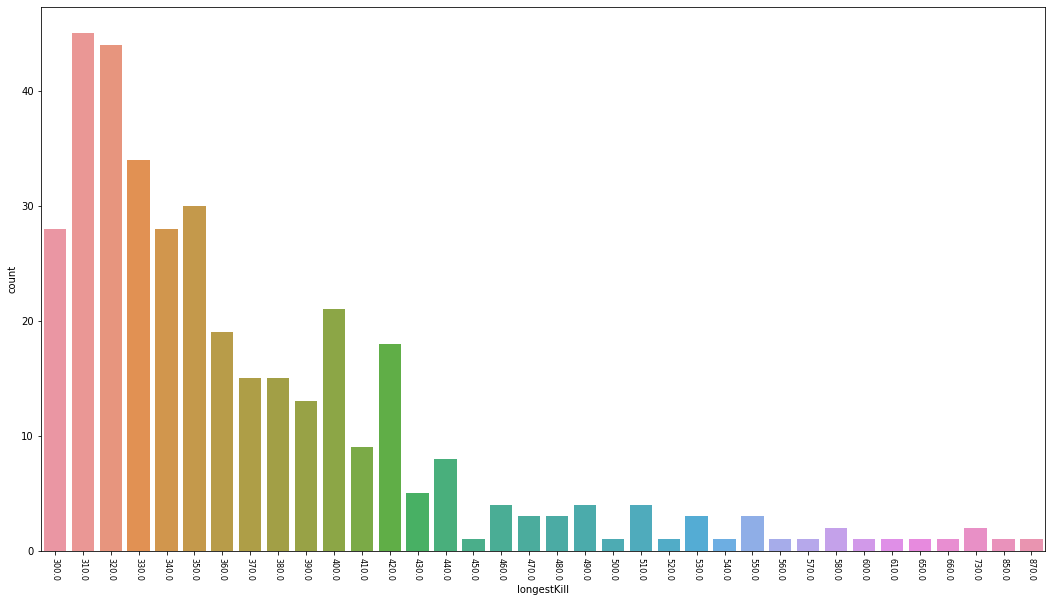

In [ ]:
plt.figure(figsize=(18,10))
sns.countplot(np.round(df[df['longestKill'] > 300]['longestKill'], -1))
plt.xticks(rotation=-90, size=8)

### heal & boost

In [ ]:
df['heals'].describe(), df['boosts'].describe()

(count    133848.000000
 mean          1.010639
 std           2.391443
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           1.000000
 max          63.000000
 Name: heals, dtype: float64,
 count    133848.000000
 mean          1.058985
 std           1.794402
 min           0.000000
 25%           0.000000
 50%           0.000000
 75%           2.000000
 max          21.000000
 Name: boosts, dtype: float64)

In [ ]:
df[df['heals'] > 10]['heals'].value_counts().sort_index()

11    326
12    219
13    164
14    120
15    106
16     65
17     74
18     47
19     46
20     58
21     36
22     32
23     24
24     20
25     11
26     16
27     14
28     14
29      7
30      6
31      9
32      6
33      6
34      1
35      6
37      2
38      4
39      2
40      2
41      1
42      1
44      2
45      4
47      1
48      1
52      1
63      1
Name: heals, dtype: int64

In [ ]:
df[df['boosts'] > 5]['boosts'].value_counts().sort_index()

6     2268
7     1326
8      753
9      372
10     204
11     103
12      52
13      27
14       6
15       4
16       1
17       1
18       1
21       2
Name: boosts, dtype: int64

### Kill streaks

In [ ]:
df['killStreaks'].describe()

count    133848.000000
mean          0.482936
std           0.556847
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           5.000000
Name: killStreaks, dtype: float64

In [ ]:
df['killStreaks'].value_counts()

0    72970
1    57364
2     3295
3      191
4       27
5        1
Name: killStreaks, dtype: int64

### matchid

In [ ]:
df['matchId'].unique().shape

(5679,)

In [ ]:
plt.figure(figsize=(18,10))
ax = sns.countplot(x="matchId", data=df, label='Alone')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
col = 'maxPlace'
sns.countplot(df[df[col] >= 75][col])
plt.xlabel(col)

In [ ]:
col = 'numGroups'
sns.countplot(df[df[col] >= 75][col])
plt.xlabel(col)

### Headshot Rate

In [ ]:
df['headshotRate'] = df['headshotKills'] / df['kills']
df['headshotRate'].fillna(0, inplace=True)

In [ ]:
df['headshotRate'].describe()

In [ ]:
sns.distplot(df[df['kills'] > 0]['headshotRate'], kde=False)

## Total distance

In [1]:
df['totalDistance'] = df['walkDistance'] + df['rideDistance'] + df['swimDistance']

NameError: ignored

In [ ]:
df['itemUsed'] = df['heals'] + df['boosts']

In [ ]:
win_place = df.pop('winPlacePerc')

In [ ]:
df['winPlacePerc'] = win_place
df

In [ ]:
headshot_kill5 = df[(df['headshotRate'] == 1) & (df['kills'] > 5)]
headshot_kill5[['kills', 'headshotKills', 'totalDistance', 'itemUsed', 'longestKill', 'winPlacePerc']]

In [ ]:
df.drop(headshot_kill5.index, inplace=True)

### camper hack ?

In [ ]:
df['totalDistance'].describe()

In [ ]:
df[(df['totalDistance'] < 2000) & df['kills'] > 5]

### Kill & winner

In [ ]:
create_fig()
sns.pointplot(x='kills', y='winPlacePerc', data=df)

In [ ]:
plt.plot(df['kills'], df['winPlacePerc'], 'o', alpha=0.2, markersize=0.5)
plt.xlabel('kills')
plt.ylabel('winPlacePerc')

In [ ]:
sns.jointplot(x='winPlacePerc', y='kills', data=df, height=10, ratio=4)

In [ ]:
boxplot_killwin_df = df[['kills', 'winPlacePerc']]
boxplot_killwin_df['winPlacePerc'] = np.round(boxplot_killwin_df['winPlacePerc'], 1)

create_fig()
sns.boxplot(x='winPlacePerc', y='kills', data=boxplot_killwin_df)

In [ ]:
create_fig()
sns.boxplot(x='kills', y='winPlacePerc', data=boxplot_killwin_df)

In [ ]:
boxplot_killwin_df['kill_group'] = pd.cut(boxplot_killwin_df['kills'], [-1, 0, 2, 5, 10, 25], labels=['< 0', '1-2', '3-5', '6-10', '10+'])
create_fig()
sns.boxplot(x='kill_group', y='winPlacePerc', data=boxplot_killwin_df)

### heal boost & winner

In [ ]:
sns.pointplot(x='heals', y='winPlacePerc', data=df, color='blue', label='heal')
sns.pointplot(x='boosts', y='winPlacePerc', data=df, color='orange', label='boost')
plt.xlabel('Number of item')

### corelation

In [ ]:
df_corr = df.corr()

In [ ]:
f,ax = plt.subplots(figsize=(15, 15), dpi=100)
sns.heatmap(df_corr, annot=True, fmt=".2f", ax=ax, linewidth=0.5, square=True, cmap='RdBu')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()

In [ ]:
select_corr_cols = df_corr[np.abs(df_corr) > 0.5]['winPlacePerc'].dropna().index

In [ ]:
f,ax = plt.subplots(figsize=(10, 10), dpi=100)
sns.heatmap(df_corr.loc[select_corr_cols.tolist(), select_corr_cols], annot=True, fmt=".2f", ax=ax, linewidth=0.5, square=True, cmap='RdBu')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()


In [ ]:
df_corr

In [ ]:
link = linkage(df_corr)
create_fig()
dendrogram(link, labels=df_corr.index, orientation="left")
plt.show()

### top10

In [ ]:
top_df = df[df['winPlacePerc'] >= 0.90]
top_df['winPlacePerc'] = np.round(top_df['winPlacePerc'], 2)

NameError: name 'df' is not defined

In [ ]:
top_df.iloc[:, 0:15].describe()

In [ ]:
top_df.iloc[:, 15:].describe()

In [ ]:
create_fig()
sns.boxplot(x='winPlacePerc', y='kills', data=top_df)

In [ ]:
create_fig()
sns.boxplot(x='winPlacePerc', y='headshotRate', data=top_df)

In [ ]:
top_corr = top_df.corr()
f,ax = plt.subplots(figsize=(15, 15), dpi=100)
sns.heatmap(df_corr, annot=True, fmt=".2f", ax=ax, linewidth=0.5, square=True, cmap='RdBu')
b, t = plt.ylim()
plt.ylim(b+0.5, t-0.5)
plt.show()